In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./OnlineNewsPopularity.csv')
print(df[df[' n_unique_tokens'] > 1])
df = df[df[' n_unique_tokens'] <= 1]
df = df[df[' n_non_stop_words'] <= 1]
df = df[df[' n_non_stop_unique_tokens'] <= 1]
df

                                                     url   timedelta  \
31037  http://mashable.com/2014/08/18/ukraine-civilia...       142.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
31037              9.0             1570.0             701.0   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
31037             1042.0                      650.0        11.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
31037             10.0       51.0  ...                     0.0   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
31037                     0.0                     0.0                     0.0   

        max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
31037                     0.0                  0.0                        0.0   

        abs_title_subjectivity   abs_title_sentiment_polarity   shares  
31037                      0.0                            0.0

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [3]:
irrelevant_attr = ["url", "timedelta"]
nlp_attr = ["n_tokens_title", "n_tokens_content", "n_unique_tokens", "n_non_stop_words", "n_non_stop_unique_tokens",  "average_token_length", "num_keywords",
            "kw_min_min", "kw_max_min", "kw_avg_min", "kw_min_max", "kw_max_max", "kw_avg_max", "kw_min_avg", "kw_max_avg", "kw_avg_avg",
            "global_subjectivity", "global_sentiment_polarity", "global_rate_positive_words", "global_rate_negative_words", "rate_positive_words", "rate_negative_words", "avg_positive_polarity", "min_positive_polarity","max_positive_polarity", "avg_negative_polarity", "min_negative_polarity", "max_negative_polarity", "title_subjectivity", "title_sentiment_polarity", "abs_title_subjectivity", "abs_title_sentiment_polarity"]
media_attr = ["num_hrefs", "num_self_hrefs", "num_imgs", "num_videos", "self_reference_min_shares", "self_reference_max_shares", "self_reference_avg_sharess"]
channel_attr = ["data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus", "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world"]
weekday_attr = ["weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday", "weekday_is_saturday", "weekday_is_sunday", "is_weekend"]
LDA_attr = ["LDA_00", "LDA_01", "LDA_02", "LDA_03", "LDA_04"]
label = ["shares"]
len(irrelevant_attr) + len(nlp_attr) + len(media_attr) + len(channel_attr) + len(weekday_attr) + len(LDA_attr) + len(label)


61

In [4]:
y = np.array(df[" shares"].to_numpy() >= 1400, dtype=int)
print(np.sum(y))
print(len(y) - np.sum(y))

21153
18490


n_tokens_title 23.0 2.0 10.398784148525591 -0.043997777745806564 1.9445207160251226
n_tokens_content 8474.0 0.0 546.4889135534647 0.0022896398718029107 0.00614845406127877
n_unique_tokens 0.999999966667 0.0 0.530546726502697 -0.047643514370620886 3.1885159285598865
n_non_stop_words 0.99999999978 0.0 0.9702091115458326 -0.017795702786206333 0.3740073896956577
n_non_stop_unique_tokens 0.999999985507 0.0 0.6727964412393199 -0.05507913739002035 4.241171843448871
average_token_length 8.04153354633 0.0 4.548235586560036 -0.028717895097073735 0.637370163771378
num_keywords 10.0 1.0 7.223772166586787 0.07308830613207905 13.779616798696996
kw_min_min 377.0 -1.0 26.107484297353885 0.039699374604784884 26.909418959240455
kw_max_min 298400.0 0.0 1153.961165653457 0.08423636127438858 5.999755136064698
kw_avg_min 42827.8571429 -1.0 312.3712210836877 0.09237413252949064 7.6717804024984675
kw_min_max 843300.0 0.0 13612.114774361173 0.020741456347193373 5.0635989409357
kw_max_max 843300.0 0.0 752321.77

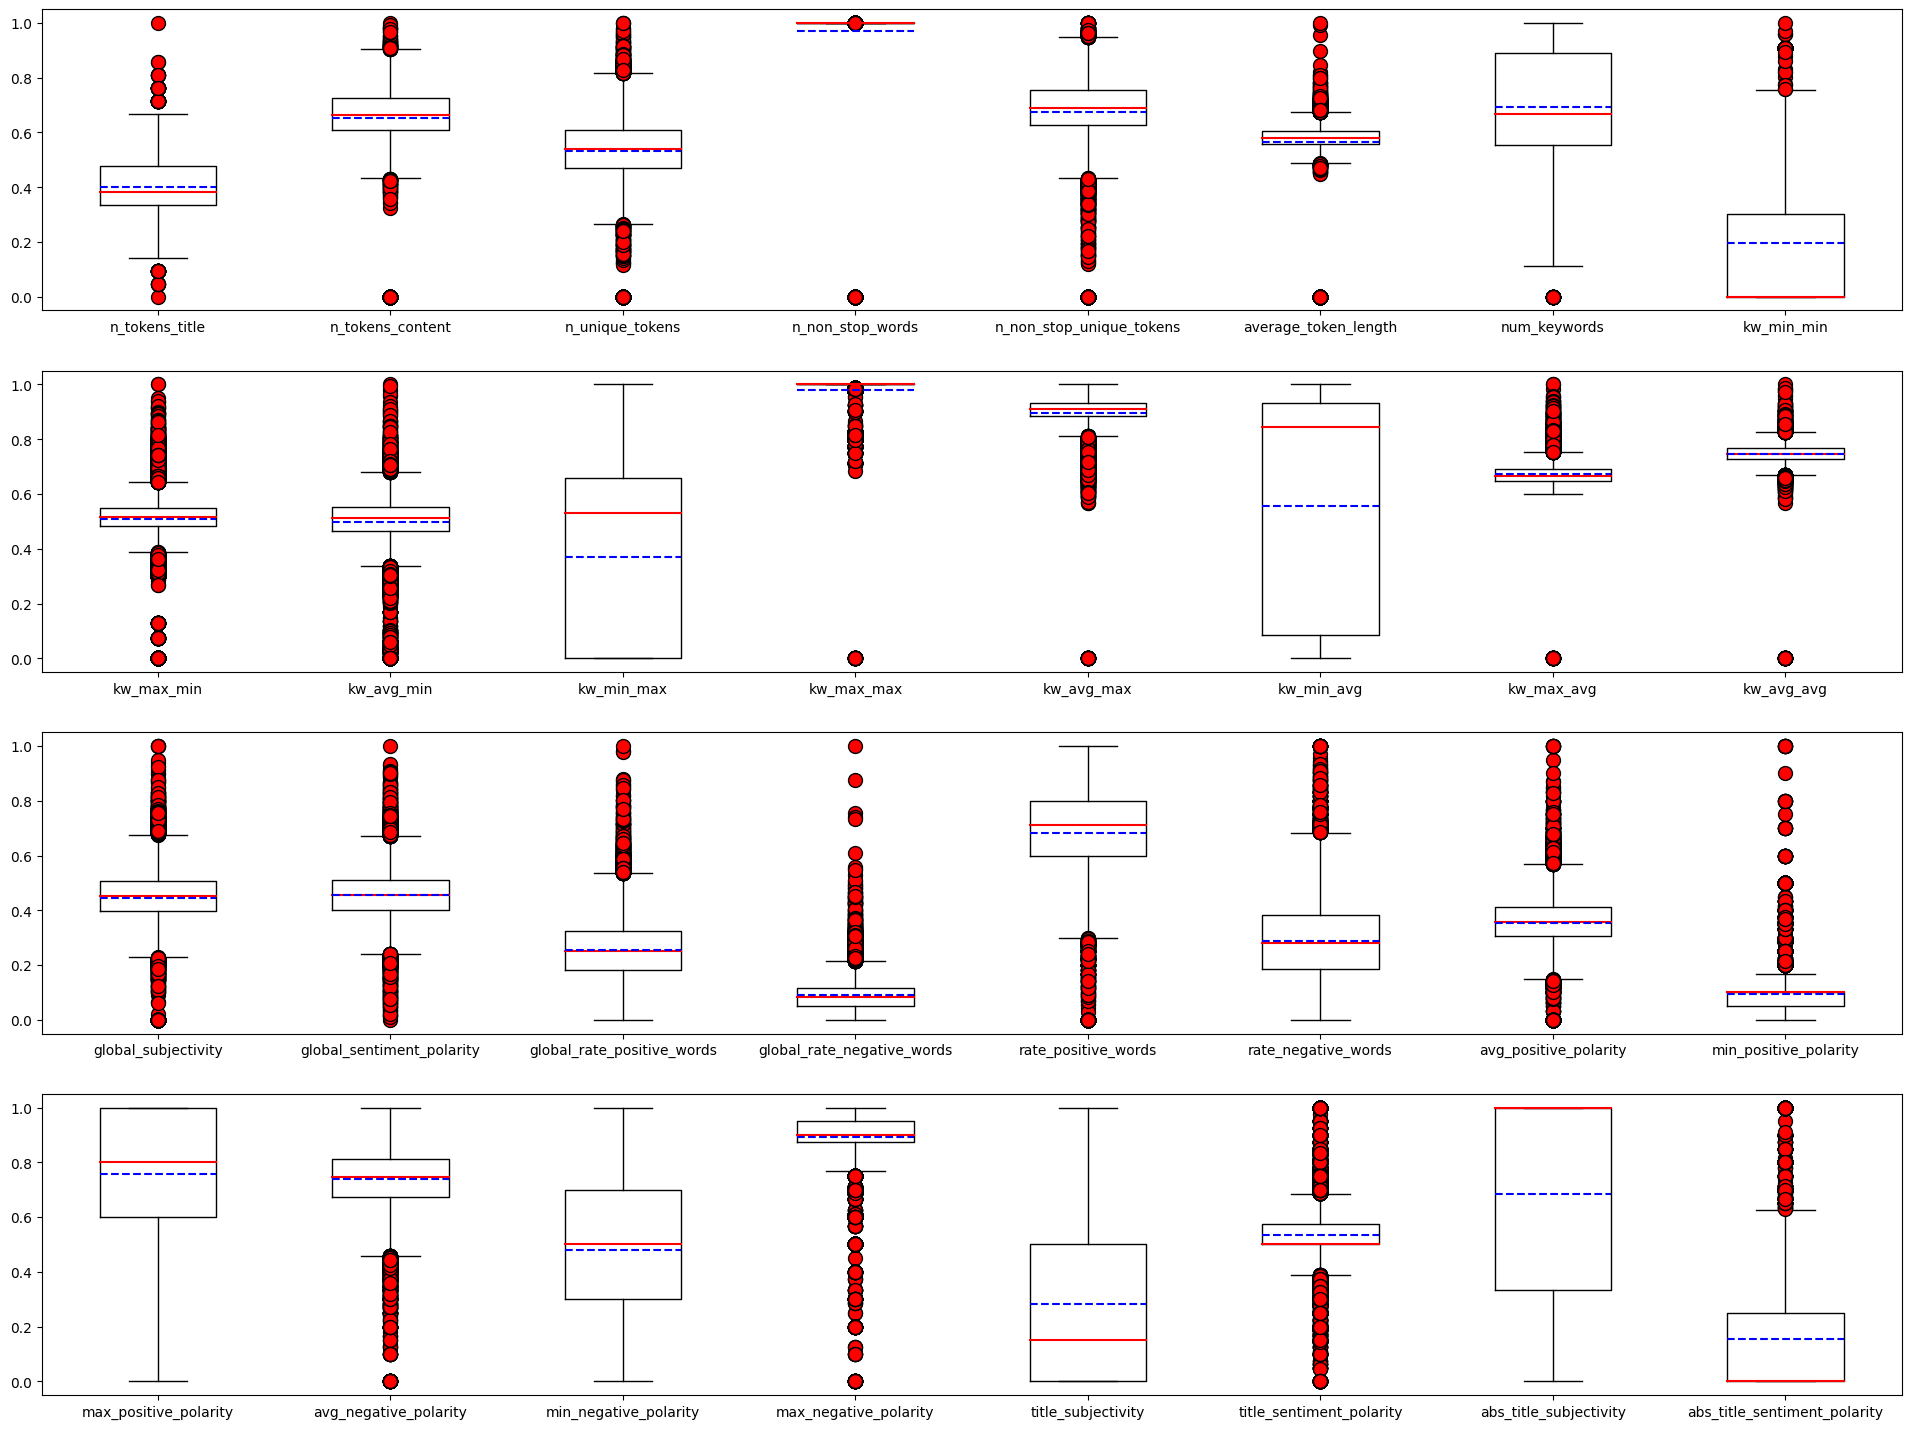

In [5]:
from scipy.stats import pearsonr
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

apply_log = [False, True, False, False, False, False, False, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
fig = plt.figure(figsize=(24, 18))
feats = []
for i in range(len(nlp_attr)):
    attr = nlp_attr[i]
    feat = df[" " + attr].to_numpy()
    if apply_log[i]:
        feat = np.log((feat - np.min(feat) + 1))
    feat = MinMaxScaler().fit_transform(feat.reshape(-1, 1)).reshape(1, -1)[0]
    print(attr, df[" " + attr].max(), df[" " + attr].min(), df[" " + attr].mean(), pearsonr(feat, y)[0], chi2(feat.reshape(-1, 1), y.reshape(-1, 1))[0][0])
    feats.append(feat)
for i in range(4):
    ax = plt.subplot2grid((4, 1),(i, 0))
    plt.boxplot(
        feats[i * 8: i * 8 + 8], 
        medianprops={'color': 'red', 'linewidth': '1.5'},
        meanline=True,
        showmeans=True,
        meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
        flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 10},
        labels=nlp_attr[i * 8: i * 8 + 8]
    )
plt.show()

num_hrefs 304.0 0.0 10.883686905632773 0.0777157322095933 12.716779770212556
num_self_hrefs 116.0 0.0 3.293469212723558 0.040133806203474814 5.321880687477234
num_imgs 128.0 0.0 4.542971016320662 0.08535305271592036 50.46488986749722
num_videos 91.0 0.0 1.2499054057462855 0.021206893323916703 4.559516739786037
self_reference_min_shares 843300.0 0.0 3998.836210680322 0.07103001247537066 22.4001558055298
self_reference_max_shares 843300.0 0.0 10329.473217718134 0.0699121961598988 24.182246021684364
self_reference_avg_sharess 843300.0 0.0 6401.684395213335 0.07236100795240998 24.548190516594495
LDA_00 0.926994384393 0.0181819715401 0.18460370481964025 0.06727027692646828 82.02594093673511
LDA_01 0.925946986138 0.0181819524559 0.14125933632415438 -0.07885889482695879 106.51253925020923
LDA_02 0.919999088666 0.0181819190697 0.21632642349851025 -0.15988078428550545 451.4372854311383
LDA_03 0.926533782685 0.018181994461 0.22377526113220184 0.05861398068445174 63.548474321793236
LDA_04 0.92719

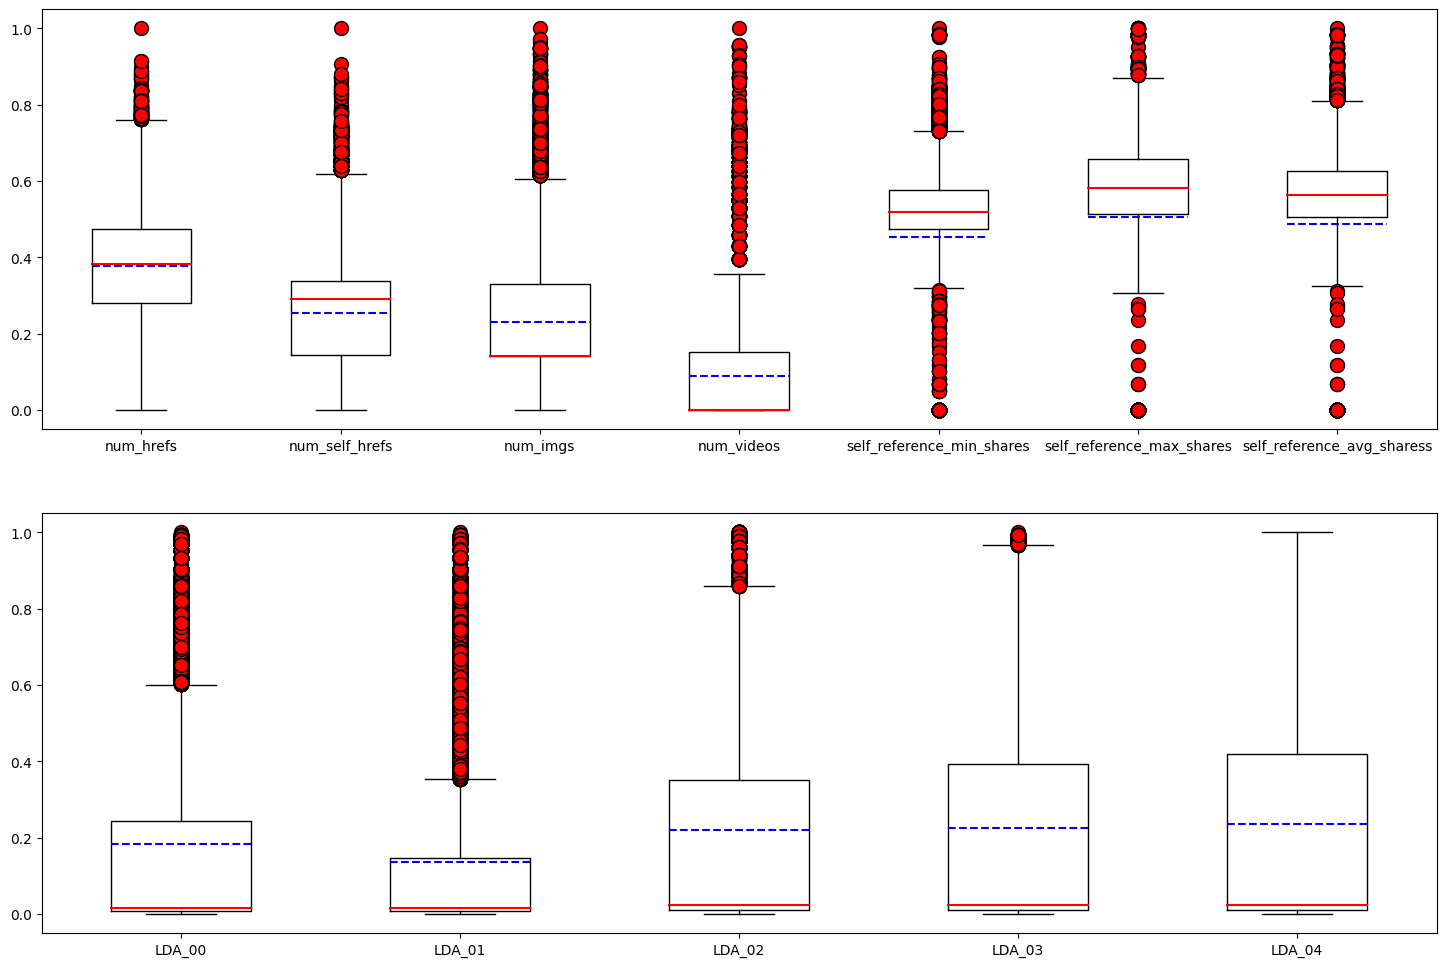

In [6]:
fig = plt.figure(figsize=(18, 12))
feats = []
for i in range(len(media_attr)):
    attr = media_attr[i]
    feat = np.log(df[" " + attr].to_numpy() + 1)
    feat = MinMaxScaler().fit_transform(feat.reshape(-1, 1)).reshape(1, -1)[0]
    print(attr, df[" " + attr].max(), df[" " + attr].min(), df[" " + attr].mean(), pearsonr(feat, y)[0], chi2(feat.reshape(-1, 1), y.reshape(-1, 1))[0][0])
    feats.append(feat)

ax = plt.subplot2grid((2, 1), (0, 0))
plt.boxplot(
    feats, 
    medianprops={'color': 'red', 'linewidth': '1.5'},
    meanline=True,
    showmeans=True,
    meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
    flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 10},
    labels=media_attr
)
feats = []
for i in range(len(LDA_attr)):
    attr = LDA_attr[i]
    feat = df[" " + attr].to_numpy()
    feat = MinMaxScaler().fit_transform(feat.reshape(-1, 1)).reshape(1, -1)[0]
    print(attr, df[" " + attr].max(), df[" " + attr].min(), df[" " + attr].mean(), pearsonr(feat, y)[0], chi2(feat.reshape(-1, 1), y.reshape(-1, 1))[0][0])
    feats.append(feat)

ax = plt.subplot2grid((2, 1), (1, 0))
plt.boxplot(
    feats, 
    medianprops={'color': 'red', 'linewidth': '1.5'},
    meanline=True,
    showmeans=True,
    meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
    flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 10},
    labels=LDA_attr
)
plt.show()

[3391.0, 3650.0, 3621.0, 3669.0, 3113.0, 1828.0, 1881.0, 3709.0]
[3270.0, 3739.0, 3814.0, 3598.0, 2588.0, 625.0, 856.0, 1481.0]


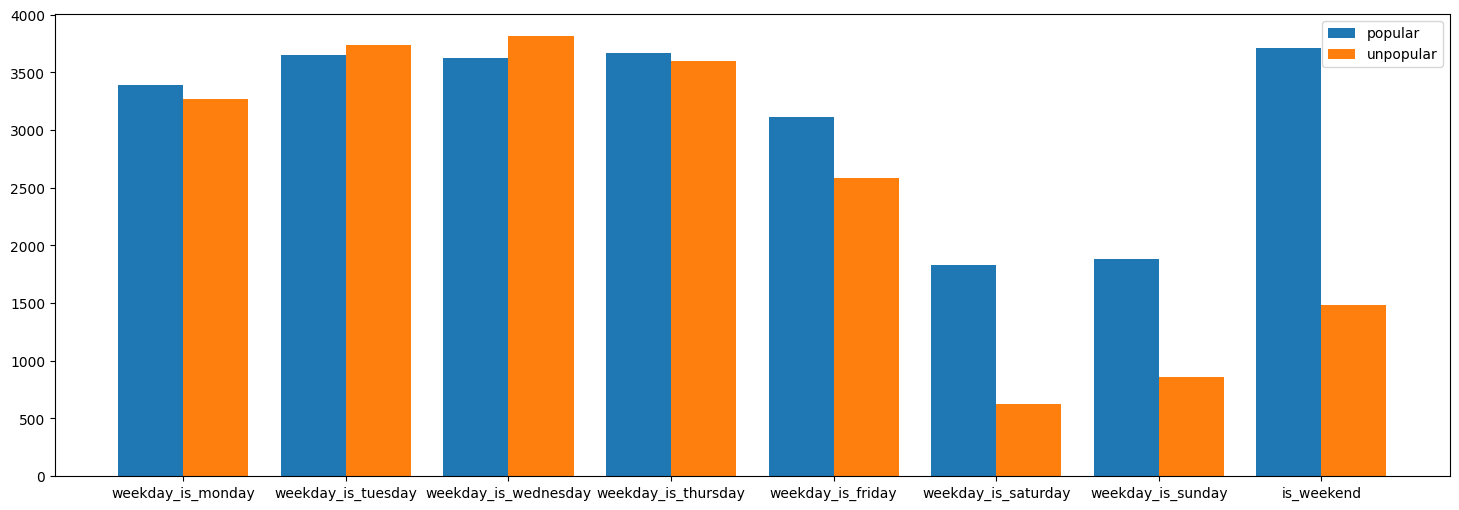

In [7]:
fig = plt.figure(figsize=(18, 6))
day_pos = []
day_neg = []
for attr in weekday_attr:
    day = df[" " + attr].to_numpy()
    day_pos.append(np.sum(day * y))
    day_neg.append(np.sum(day * (1 - y)))
print(day_pos)
print(day_neg)
x = np.arange(len(day_pos)) * 1.5
plt.xticks(x, weekday_attr)
plt.bar(x - 0.3, day_pos, width=0.6, label='popular')
plt.bar(x + 0.3, day_neg, width=0.6, label='unpopular')
plt.legend()
plt.show()

[1283.0, 2901.0, 3312.0, 1760.0, 4710.0, 3249.0]
[816.0, 4155.0, 2946.0, 563.0, 2636.0, 5178.0]


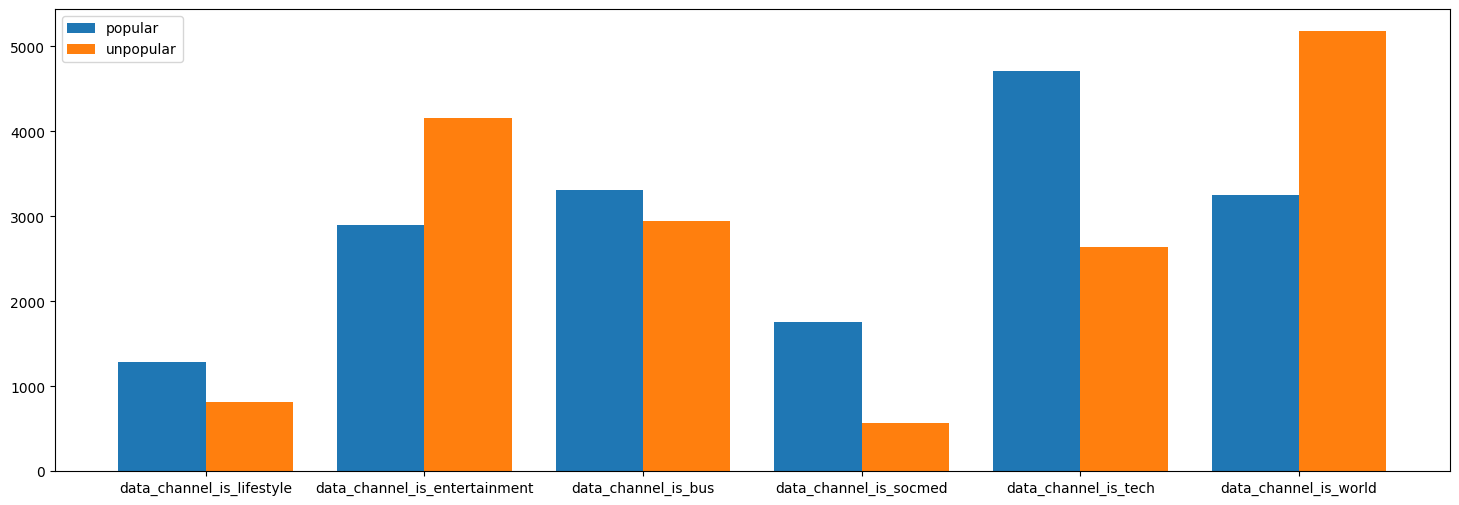

In [8]:
fig = plt.figure(figsize=(18, 6))
channel_pos = []
channel_neg = []
for attr in channel_attr:
    channel = df[" " + attr].to_numpy()
    channel_pos.append(np.sum(channel * y))
    channel_neg.append(np.sum(channel * (1 - y)))
print(channel_pos)
print(channel_neg)
x = np.arange(len(channel_pos)) * 1.5
plt.xticks(x, channel_attr)
plt.bar(x - 0.3, channel_pos, width=0.6, label='popular')
plt.bar(x + 0.3, channel_neg, width=0.6, label='unpopular')
plt.legend()
plt.show()

39643
[[ 0.59385898  0.14350452]
 [-0.45531029 -0.08200078]
 [-0.5058659   0.27205646]
 ...
 [ 0.50572098 -0.09490642]
 [ 0.63526936 -0.96118313]
 [-0.35794979 -0.55941584]]


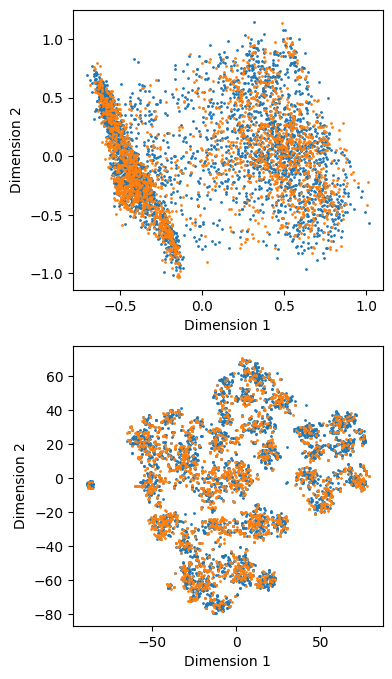

In [25]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

numerical_feats = nlp_attr + media_attr + LDA_attr
for i in range(len(numerical_feats)):
    numerical_feats[i] = ' ' + numerical_feats[i]
print(df.shape[0])
features_raw = MinMaxScaler().fit_transform(df[numerical_feats])
shares = df[' shares'].to_numpy()
plt.figure(figsize=(4, 8))

ax = plt.subplot2grid((2, 1), (0, 0))
pca = PCA(n_components=2).fit(features_raw[:5000])
reduced_features = pca.transform(features_raw[:5000])
print(reduced_features)
pop, unpop = [], []
for i in range(5000):
    if shares[i] >= 1400:
        pop.append(i)
    else:
        unpop.append(i)
pop = np.array(pop)
unpop = np.array(unpop)
feat_pop = reduced_features[pop]
feat_unpop = reduced_features[unpop]
ax.scatter(feat_pop[:, 0], feat_pop[:, 1], s=1)
ax.scatter(feat_unpop[:, 0], feat_unpop[:, 1], s=1)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

ax = plt.subplot2grid((2, 1), (1, 0))
tsne = TSNE(n_components=2, method='barnes_hut')
reduced_features = tsne.fit_transform(features_raw[:5000])

pop, unpop = [], []
for i in range(5000):
    if shares[i] >= 1400:
        pop.append(i)
    else:
        unpop.append(i)
pop = np.array(pop)
unpop = np.array(unpop)
feat_pop = reduced_features[pop]
feat_unpop = reduced_features[unpop]
ax.scatter(feat_pop[:, 0], feat_pop[:, 1], s=1)
ax.scatter(feat_unpop[:, 0], feat_unpop[:, 1], s=1)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

plt.show()

[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' average_token_length', ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity', ' abs_title_sentiment_polarity', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04']


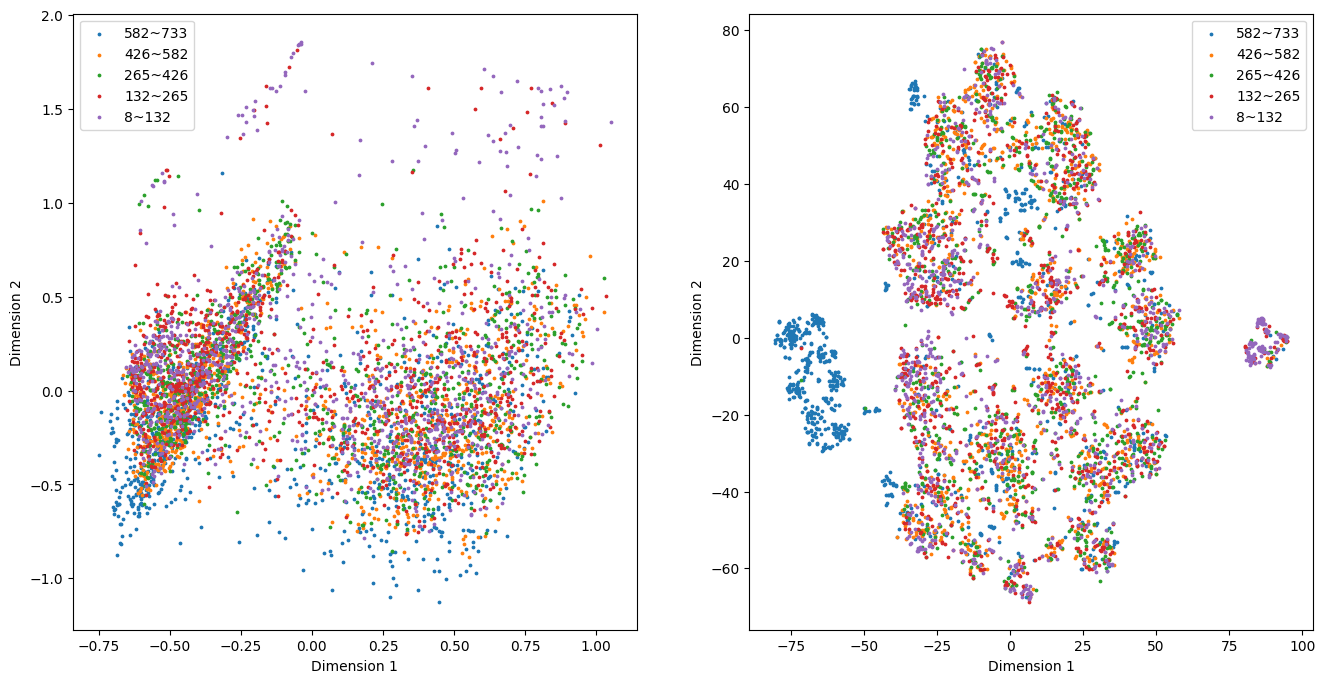

In [26]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

numerical_feats = nlp_attr + media_attr + LDA_attr
for i in range(len(numerical_feats)):
    numerical_feats[i] = ' ' + numerical_feats[i]
print(numerical_feats)
features_raw = MinMaxScaler().fit_transform(df[numerical_feats])
shares = df[' shares'].to_numpy()
plt.figure(figsize=(16, 8))
t_thld = [(582, 733), (426, 582), (265, 426), (132, 265), (8, 132)]
indexes = []
t = df[' timedelta'].to_numpy()

for i in range(5):
    cur_idx = []
    for j in range(len(t)):
        if t[j] >= t_thld[i][0] and t[j] < t_thld[i][1]:
            cur_idx.append(j)
    cur_idx = np.array(cur_idx)
    perm = np.random.permutation(len(cur_idx))[:1000]
    if i == 0:
        indexes = cur_idx[perm]
    else:
        indexes = np.concatenate((indexes, cur_idx[perm]))
indexes = np.sort(indexes)

ax = plt.subplot2grid((1, 2), (0, 0))
pca = PCA(n_components=2).fit(features_raw[indexes])
reduced_features = pca.transform(features_raw[indexes])
for i in range(5):
    idx = np.arange(i * 1000, (i + 1) * 1000)
    ax.scatter(reduced_features[idx, 0], reduced_features[idx, 1], s=3, label=str(t_thld[i][0]) + '~' + str(t_thld[i][1]))
ax.legend()
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

ax = plt.subplot2grid((1, 2), (0, 1))
tsne = TSNE(n_components=2, method='barnes_hut')
reduced_features = tsne.fit_transform(features_raw[indexes])
for i in range(5):
    idx = np.arange(i * 1000, (i + 1) * 1000)
    ax.scatter(reduced_features[idx, 0], reduced_features[idx, 1], s=3, label=str(t_thld[i][0]) + '~' + str(t_thld[i][1]))
ax.legend()
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

plt.show()

3135.8642831589877
0.11931227887806126
10.398784148525591


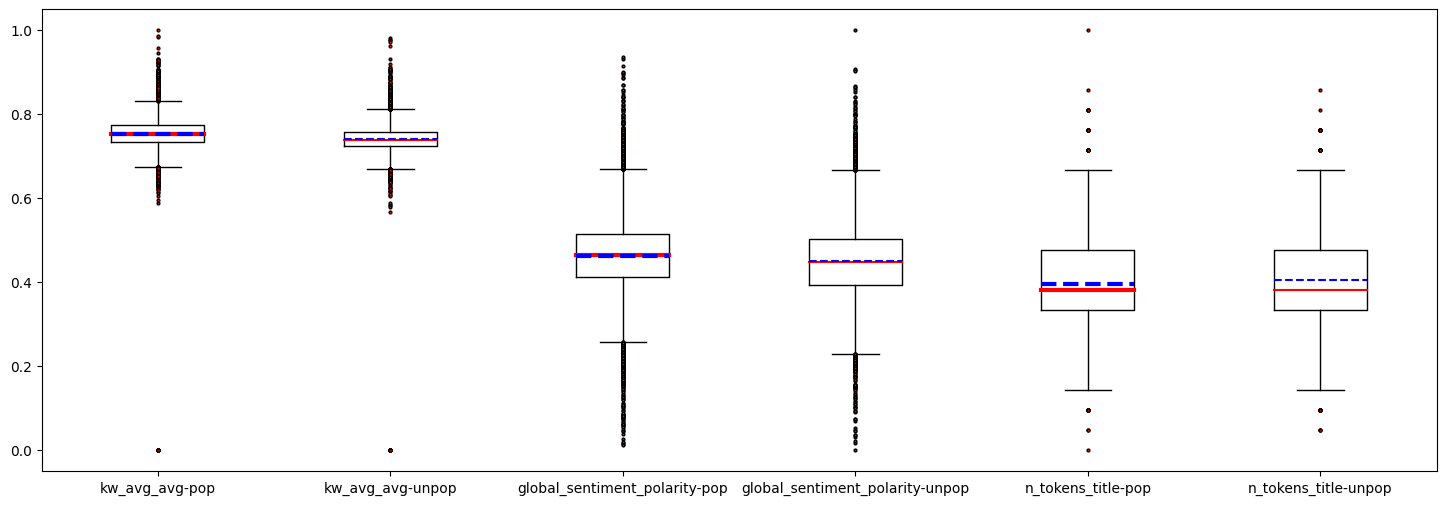

In [52]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(18, 6))
core_features = ["is_weekend", "data_channel_is_world", "kw_avg_avg", "global_sentiment_polarity", "n_tokens_title"]
y = np.array(df[" shares"].to_numpy() >= 1400, dtype=int)
feats = []
labels = []
for idx, label in enumerate(core_features):
    if idx < 2:
        continue
    feat = df[' ' + label].to_numpy()
    print(np.mean(feat))
    if label == "kw_avg_avg":
        feat = np.log(feat + 1)
    feat = MinMaxScaler().fit_transform(feat.reshape(-1, 1)).reshape(1, -1)[0]
    x1, x2 = [], []
    for i in range(len(feat)):
        if y[i] == 1:
            x1.append(feat[i])
        else:
            x2.append(feat[i])
    #feats.append(np.array(x1))
    #feats.append(np.array(x2))
    #labels.append(label + "-pop")
    #labels.append(label + "-unpop")
    plt.boxplot(
        [np.array(x1)], 
        medianprops={'color': 'red', 'linewidth': '3'},
        meanline=True,
        showmeans=True,
        meanprops={'color': 'blue', 'ls': '--', 'linewidth': '3'},
        flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 2},
        positions=[idx * 2],
        widths=[0.4],
        labels=[label+"-pop"]
    )
    plt.boxplot(
        [np.array(x2)], 
        medianprops={'color': 'red', 'linewidth': '1.5'},
        meanline=True,
        showmeans=True,
        meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
        flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 2},
        positions=[idx * 2 + 1],
        widths=[0.4],
        labels=[label+"-unpop"]
    )